# **THE SPARKS FOUNDATION**

## **TASK 1 - Prediction using Supervised ML**

### *Author - Gaurav Agrawal*

In [10]:
import numpy as np                                       # Required python libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [11]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
# To check for a null value in the Dataset
data.isnull == True

False

In [13]:
#No null value in the Dataset, hence we can visualize the Data.

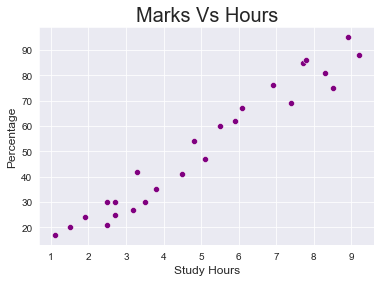

In [14]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'],color = 'Purple')
plt.title('Marks Vs Hours',size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()

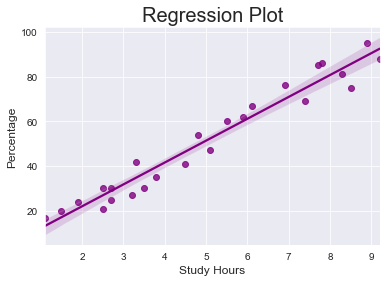

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x= data['Hours'], y= data['Scores'], color='Purple')
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()
print(data.corr())

## Training the Model

### 1) Splitting the Data

# Define X and Y from the Data

In [16]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

# Split the Data in two

In [17]:
train_X, value_X, train_Y, value_Y = train_test_split(X, Y, random_state = 0)

### 2) Fit the Data into the model

In [18]:
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("-Trained Model-")

-Trained Model-


## Prediction of the Percentage of Marks

In [19]:
prediction_Y = regression.predict(value_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in value_X], 'Predicted Marks': [k for k in prediction_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [20]:
compare_scores = pd.DataFrame({'Actual Marks': value_Y, 'Predicted Marks': prediction_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

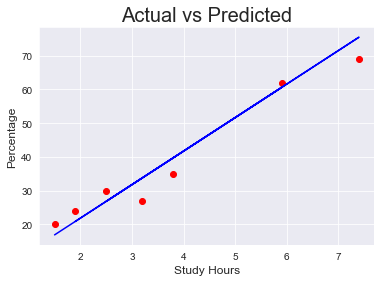

In [37]:
plt.scatter(x=value_X, y=value_Y, color='Red')
plt.plot(value_X, prediction_Y, color='Blue')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Study Hours', size=12)
plt.show()

## Model Evaluation

# Calculation of accuracy of the model

In [38]:
print('Mean Absolute Error: ',mean_absolute_error(value_Y,prediction_Y))

Mean Absolute Error:  4.130879918502486


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [39]:
hours = [9.25]
result = regression.predict([hours])
print("Score = {}".format(round(result[0],3)))

Score = 93.893


## According to the regression model if a student studies for 8 hours a day he/she is likely to score 93.89 marks.